# Eigenvalues and Eigenvectors; or 
## How Matrices Really Work

This notebook will first focus on a geometric understanding of eigenvalues and eigenvectors, then introduce some more advanced applications relevant to mathematical modelling. It is intended as a practical introduction, not a rigorous theoretical exposition.

Numerical examples will make use of NumPy and its older sybling, SciPy.

### Imports

In [1]:
import numpy as np
from scipy import linalg
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### A motivating example

The concept of taking the square of a square matrix is straightforward (to a person familiar with matrix multiplication).

Say
\begin{align*}
A = \left(\begin{matrix}8 & 5\\6 & 1\end{matrix}\right),
\end{align*}
so
\begin{align*}
A^2 = A\times A=\left(\begin{matrix}94 & 45\\54 & 31\end{matrix}\right).
\end{align*}

But what if you wanted to raise 2 to the power of a matrix?
\begin{align*}
2^A = \text{?}.
\end{align*}

What does that even mean?

### What is an eigenvalue?

For a matrix $A$, any non-zero vector $\mathbf{v}$ and scalar $w$ such that
\begin{align*}
A\mathbf{v} = w\mathbf{v},
\end{align*}
$w$ is an eigenvalue of $A$ and $\mathbf{v}$ is an eigenvector of $A$. $w$ and $\mathbf{v}$ are an eigenvalue-eigenvector pair. (Practically everyone uses the symbol $\lambda$ to represent eigenvalues, but in Python `lambda` is a reserved keyword, so we will use $w$ throughout.)

### Who cares?

First let's see what matrices do, geometrically speaking.

Start by plotting a grid.

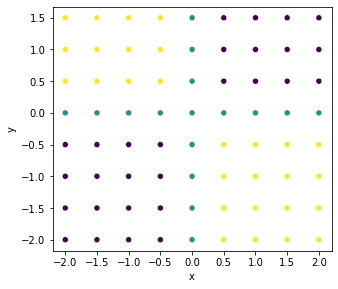

In [2]:
x, y = np.meshgrid(np.arange(-2, 2.1, 0.5), np.arange(-2, 2, 0.5))
xy_vectors = np.array([x.flatten(), y.flatten()])
xy = pd.DataFrame({'x': xy_vectors[0], 'y': xy_vectors[1]})
xy['quadrant'] = -np.sign(xy['x'] * xy['y'])
fig, ax = plt.subplots(figsize=(5, 5))
ax = sns.scatterplot(data=xy, x='x', y='y', hue='quadrant', 
                     legend=False, palette=plt.get_cmap('viridis'), ax=ax)
ax.set_aspect('equal')

Now generate a random matrix. Ok, this is a random matrix with specific properties, but mostly so the pictures look nice.

In [3]:
while True:
    V = np.random.randint(1, 10, 4).reshape((2, 2))
    if not np.isclose(np.linalg.det(V), 0):
        break
w = (1.5, 2)
A = np.linalg.inv(V) @ np.diag(w) @ V
print('Transformation matrix A:')
print(A)

Transformation matrix A:
[[ 2.29411765  1.32352941]
 [-0.17647059  1.20588235]]


### Matrices move points around
Plot what happens to each point in the grid $\mathbf{x}$ when it is multiplied by $A$. So plot $A\mathbf{x}$ for each $\mathbf{x}$ in the grid.

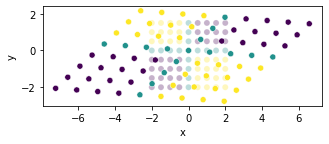

In [4]:
transformed_vectors = A @ xy_vectors
transformed_xy = pd.DataFrame(
    {'x': transformed_vectors[0], 'y': transformed_vectors[1]})
transformed_xy['quadrant'] = xy['quadrant']

fig, ax = plt.subplots(figsize=(5, 5))
ax = sns.scatterplot(data=xy, x='x', y='y', hue='quadrant', alpha=0.3,
                     legend=False, palette=plt.get_cmap('viridis'), ax=ax)
ax = sns.scatterplot(data=transformed_xy, x='x', y='y', hue='quadrant',
                     legend=False, palette=plt.get_cmap('viridis'), ax=ax)
ax.set_aspect('equal')

Multiplying by the _inverse_ matrix moves the points back to their original locations.

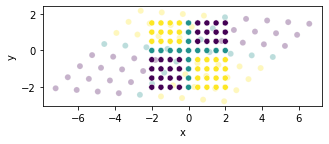

In [5]:
untransformed_vectors = np.linalg.inv(A) @ transformed_vectors
untransformed_xy = pd.DataFrame(
    {'x': untransformed_vectors[0], 'y': untransformed_vectors[1]})
untransformed_xy['quadrant'] = xy['quadrant']

fig, ax = plt.subplots(figsize=(5, 5))
ax = sns.scatterplot(data=transformed_xy, x='x', y='y', hue='quadrant', alpha=0.3,
                     legend=False, palette=plt.get_cmap('viridis'), ax=ax)
ax = sns.scatterplot(data=untransformed_xy, x='x', y='y', hue='quadrant',
                     legend=False, palette=plt.get_cmap('viridis'), ax=ax)
ax.set_aspect('equal')

Let's look more closely at what happens in the original transformation $A\mathbf{x}$ by plotting a vector for each transformation.

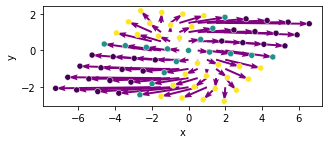

In [6]:
fig, ax = plt.subplots(figsize=(5, 5))
delta_x = transformed_xy['x'] - xy['x']
delta_y = transformed_xy['y'] - xy['y']
q = ax.quiver(xy['x'], xy['y'], delta_x, delta_y, 
              angles='xy', scale_units='xy', scale=1, 
              color='purple')
ax = sns.scatterplot(data=transformed_xy, x='x', y='y', hue='quadrant',
                     legend=False, palette=plt.get_cmap('viridis'), ax=ax)
ax.set_aspect('equal')

### Enter the eigenvectors
Plot the eigenvalues multiplied by the eigenvectors ($w\mathbf{v}$) for each eigenvalue-eigenvector pair. Note that in the direction of the eigenvectors, the transformation just moves the points further (or closer) to the origin, without changing its bearing. Note also the magnitude of the transformation is the eigenvalue.

We have obtained the eigenvalues and eigenvectors using `np.linalg.eig`. Eigenvectors are only determined up to scalar multiples, so NumPy chooses to scale them to be 1 unit long.

w1: 2.000000000000001
V1: [ 1.95237412 -0.43386092]
w2: 1.4999999999999993
V2: [-1.28623939  0.77174363]


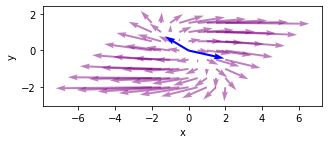

In [8]:
w, V = np.linalg.eig(A)
assert np.allclose(w.imag, 0)
w = w.real
V = V.real
V =  w * V
print('w1:', w[0])
print('V1:', V[:,0])
print('w2:', w[1])
print('V2:', V[:,1])
fig, ax = plt.subplots(figsize=(5, 5))
q = ax.quiver(xy['x'], xy['y'], delta_x, delta_y, 
              angles='xy', scale_units='xy', scale=1, 
              color='purple', alpha=0.5)
ax = sns.scatterplot(data=transformed_xy, x='x', y='y', hue='quadrant', alpha=0,
                     legend=False, palette=plt.get_cmap('viridis'), ax=ax)
q = ax.quiver((0,0), (0,0), V[0], V[1], angles='xy', scale_units='xy', scale=1, color='blue')
ax.set_aspect('equal')

### Again, who cares?

Well, any vector $\mathbf{x}$ can be restated as the sum of eigenvectors of $A$. That is,
\begin{align*}
\mathbf{x} = a\mathbf{v}_1 + b\mathbf{v}_2
\end{align*}
So
\begin{align*}
A\mathbf{x} = A(a\mathbf{v}_1 + b\mathbf{v}_2) = aA\mathbf{v}_1 + bA\mathbf{v}_2 = aw_1\mathbf{v}_1 + bw_2\mathbf{v}_2.
\end{align*}

So multiplying by a matrix is like expressing a vector as eigenvector components, then scaling those components. Regardless of the initial $\mathbf{x}$ vector, the components are always scaled by the eigenvalues.

Knowing a matrix's eigenvalues is therefore fundamental to understanding what the matrix "does".

We can figure out $a$ and $b$ by forming the matrix $V=\left(\begin{matrix}\mathbf{v}_1&\mathbf{v}_2\end{matrix}\right)$ and noting that
\begin{align}
\mathbf{x} = a\mathbf{v}_1 + b\mathbf{v}_2 = V\left(\begin{matrix}a\\b\end{matrix}\right),
\end{align}
so 
\begin{align*}
\left(\begin{matrix}a\\b\end{matrix}\right) = V^{-1}\mathbf{x}.
\end{align*}

### Eigendecomposition

To put it another way, in the 2x2 case,
\begin{align*}
A\mathbf{v}_1 = w_1\mathbf{v}_1 \quad\text{and}\quad\mathbf{v}_2 = w_2\mathbf{v}_2,
\end{align*}
or
\begin{align*}
AV = \left(\begin{matrix}A\mathbf{v}_1&A\mathbf{v}_2\end{matrix}\right) = \left(\begin{matrix}w_1\mathbf{v}_1&w_2\mathbf{v}_2\end{matrix}\right) = 
V\left(\begin{matrix}w_1&0\\0&w_2\end{matrix}\right).
\end{align*}

Multiplying from the right by $V^{-1}$ yields
\begin{align*}
A = V\left(\begin{matrix}w_1&0\\0&w_2\end{matrix}\right)V^{-1},
\end{align*}
which formalises what we saw above. Multiplying from the left by $A$ is like multiplying by $V^{-1}$ to transform the vector into a coordinate space where the basis is the eigenvectors of $A$, scaling the resulting vector by the eigenvalues, then transforming the result back to the original basis by multiplying by $V$.

If it is possible to decompose a matrix $A = VDV^{-1}$, where $D$ is a diagonal matrix of eigenvalues, we say that $A$ is _diagonalisable_. This result generalises for $m\times m$ matrices.

### Some useful facts about eigenvalues and eigenvectors

- Eigenvalues can be complex, and the complex eigenvalues of a real matrix occur in conjugate pairs.
- Eigenvectors that correspond to distinct eigenvalues are linearly independent.
- If two eigenvalues are equal, there can be two eigenvectors for that eigenvalue, and any linear combination of those eigenvectors is also an eigenvector.

### So what's this about $2^A$?

Now that we can decompose diagonalisable matrices, we can write
\begin{align*}
A^2 = VDV^{-1}VDV^{-1} = VDIDV^{-1} = VD^2V^{-1},
\end{align*}
so the square of a matrix has the same eigenvectors as the original matrix, and with eigenvalues that are the squares of the original eigenvalues (remember that $D$ is diagonal). Hopefully it's not too much of a stretch to see that we also get
\begin{align*}
A^n = VD^nV{-1}
\end{align*}
for any whole number $n$.

So if $x$ is a scalar, the Taylor expansion of $2^x$ around $x=0$ is
\begin{align*}
2^x = \sum_{n=0}^\infty \frac{(\ln 2)^nx^n}{n!}.
\end{align*}

From what we now know about eigenvalues and eigenvectors, we can apply that straight away our $m\times m$ matrix $A$,
\begin{align*}
2^A &= \sum_{n=0}^\infty \frac{(\ln 2)^nA^n}{n!} \\
&= \sum_{n=0}^\infty \frac{(\ln 2)^nVD^nV^{-1}}{n!} \\
&= V\sum_{n=0}^\infty \frac{(\ln 2)^nD^n}{n!}V^{-1} \\
&= V\left(\begin{matrix}2^{w_1}&0&\ldots&0\\
0&2^{w_2}&\ldots&0\\
\vdots&\vdots&\ddots&\vdots\\
0&0&\ldots&2^{w_m}\end{matrix}\right)V^{-1}\\
&= V2^DV^{-1}.
\end{align*}

The same goes for any function with a Taylor expansion. For instance for diagonalisable $A$, $\exp(A)=V\exp(A)V^{-1}$ and $\ln(A)=V\ln(A)V^{-1}$. $\exp(A)$ has a dizzying array of applications.

It turns out that if you want to calculate these things numerically, there are better ways than taking the eigendecomposition, but SciPy has that covered.

In [9]:
print(linalg.expm(A))  # matrix exponential

[[ 9.099272    7.69597155]
 [-1.02612954  2.77147317]]


In [10]:
print(linalg.logm(A))  # matrix logarithm

[[ 0.86237193  0.76151137]
 [-0.10153485  0.23624036]]


In [11]:
print(linalg.funm(A, lambda x: 2**x))  # 2^A

[[ 4.68916051  3.10122232]
 [-0.41349631  2.13926661]]


... or alternatively ...

In [12]:
print(linalg.expm(np.log(2)*A))

[[ 4.68916051  3.10122232]
 [-0.41349631  2.13926661]]
